In [224]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy



%matplotlib inline

In [225]:
WashingMachine_percent = pd.read_excel('../Output_Data/WashingMachine_Contour_Percent.xlsx')
WashingMachine_absolute = pd.read_excel('../Output_Data/WashingMachine_Contour_Absolute.xlsx')
WashingMachine_reference = pd.read_excel('../Output_Data/WashingMachine_Contour_Reference.xlsx')

FridgeFreezer_percent = pd.read_excel('../Output_Data/FridgeFreezer_Contour_Percent.xlsx')
FridgeFreezer_absolute = pd.read_excel('../Output_Data/FridgeFreezer_Contour_Absolute.xlsx')
FridgeFreezer_reference = pd.read_excel('../Output_Data/FridgeFreezer_Contour_Reference.xlsx')

TV_percent = pd.read_excel('../Output_Data/TV_Contour_Percent.xlsx')
TV_absolute = pd.read_excel('../Output_Data/TV_Contour_Absolute.xlsx')
TV_reference = pd.read_excel('../Output_Data/TV_Contour_Reference.xlsx')

Monitor_percent = pd.read_excel('../Output_Data/Monitor_Contour_Percent.xlsx')
Monitor_absolute = pd.read_excel('../Output_Data/Monitor_Contour_Absolute.xlsx')
Monitor_reference = pd.read_excel('../Output_Data/Monitor_Contour_Reference.xlsx')

Desktop_percent = pd.read_excel('../Output_Data/Desktop_Contour_Percent.xlsx')
Desktop_absolute = pd.read_excel('../Output_Data/Desktop_Contour_Absolute.xlsx')
Desktop_reference = pd.read_excel('../Output_Data/Desktop_Contour_Reference.xlsx')

Laptop_percent = pd.read_excel('../Output_Data/Laptop_Contour_Percent.xlsx')
Laptop_absolute = pd.read_excel('../Output_Data/Laptop_Contour_Absolute.xlsx')
Laptop_reference = pd.read_excel('../Output_Data/Laptop_Contour_Reference.xlsx')

Smartphone_percent = pd.read_excel('../Output_Data/Smartphone_Contour_Percent.xlsx')
Smartphone_absolute = pd.read_excel('../Output_Data/Smartphone_Contour_Absolute.xlsx')
Smartphone_reference = pd.read_excel('../Output_Data/Smartphone_Contour_Reference.xlsx')


# Combining contour values

This will collect the contour value results from each devices analysis output, convert into pivot tables and then subplot

In [226]:
def contourise(contour_values):
    
    Z = contour_values.pivot_table(index='x', columns='y', values='z').T.values

    X_unique = np.sort(contour_values.x.unique())
    Y_unique = np.sort(contour_values.y.unique())
    X, Y = np.meshgrid(X_unique, Y_unique)

    return X, Y, Z
    

In [227]:
def calculate_contours(reference_level):
    contour_levels = [-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60]
    adjusted_levels = []
    
    
    for index, level in enumerate(contour_levels):  

        adjusted_levels.append(reference_level + (level*reference_level*0.01))
        
    return contour_levels, adjusted_levels

In [232]:
def generate_contour_plot(percent_values, absolute_values, reference_value):
    
    percent_X, percent_Y, percent_Z = contourise(percent_values)
    absolute_X, absolute_Y, absolute_Z = contourise(absolute_values)
    contours_percent, contours_absolute = calculate_contours(reference_value.iloc[0,0])
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot()


    cpf = ax.contourf(percent_X,percent_Y,percent_Z, cmap='RdYlGn_r',  levels=contours_percent)
    cpf1 = ax.contourf(absolute_X, absolute_Y, absolute_Z, levels = contours_absolute, cmap='RdYlGn_r')


    line_colors = ['black' for l in contours_percent]
    cp = ax.contour(percent_X,percent_Y,percent_Z, levels=contours_percent, colors=line_colors)


    ax.clabel(cp, levels=None, fontsize=16, colors=line_colors)

    #plt.axvline(x=43, color = "k", linestyle = "--")
    #plt.axhline(y = 0.015, color = 'k', linestyle = '--')

    ax.set_xlabel('Diagonal Screen Size of TV / inches (2020 value = 43)')
    _ = ax.set_ylabel("Percentage of devices repaired (2020 value = 1%)")

    #ax.set_yticks([0.01,0.1,0.2,0.3,0.4,0.5]) # choose which x locations to have ticks
    #ax.set_yticklabels(["0","10","20","30","40","50"]) # set the labels to display at those ticks

    cbar = fig.colorbar(cpf1,label='Energy Demand in GWh', format='%.1f')
    ax.set_title('TV', pad=20, fontweight='bold')
    plt.rc('axes', labelsize=18) #fontsize of the title
    plt.rc('axes', titlesize=18)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

    plt.savefig('../Visualisation_Data/Figures/TV_Contour.pdf') # uncomment to save vector/high-res version

    

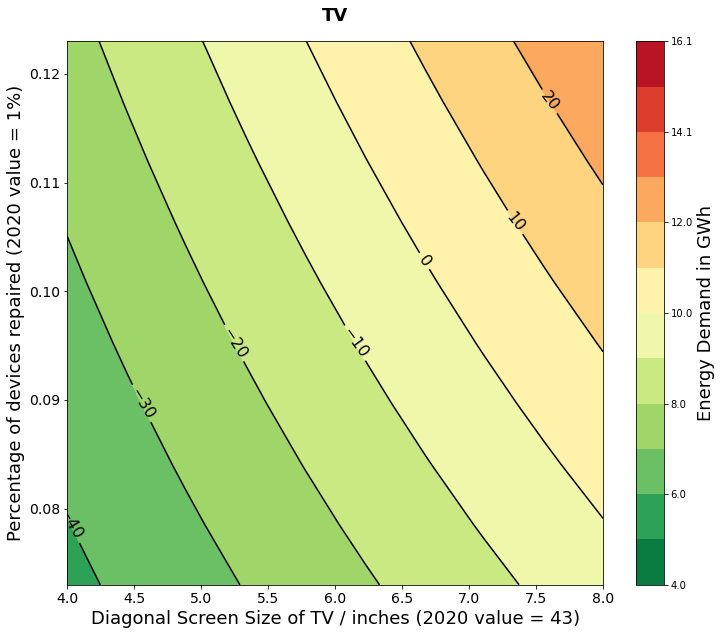

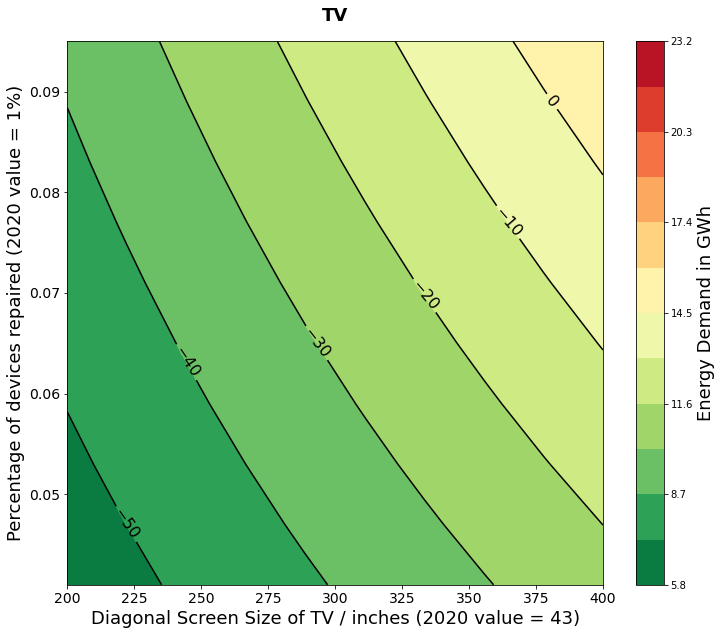

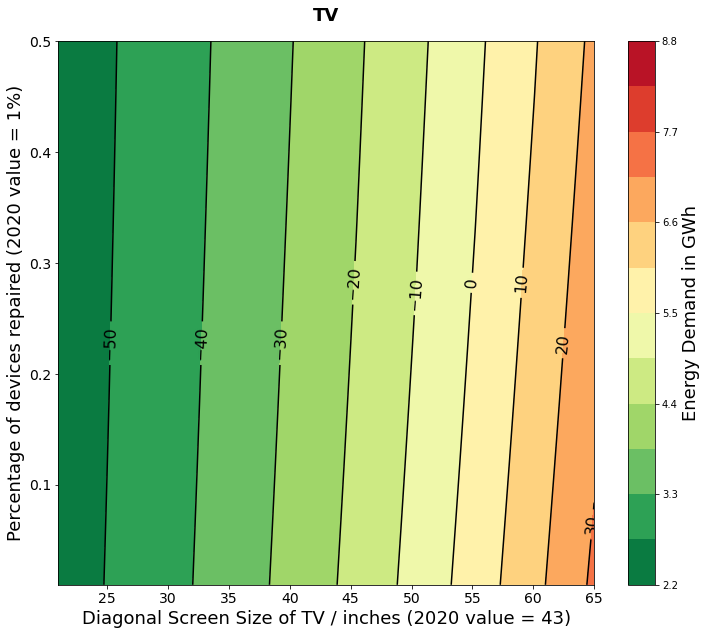

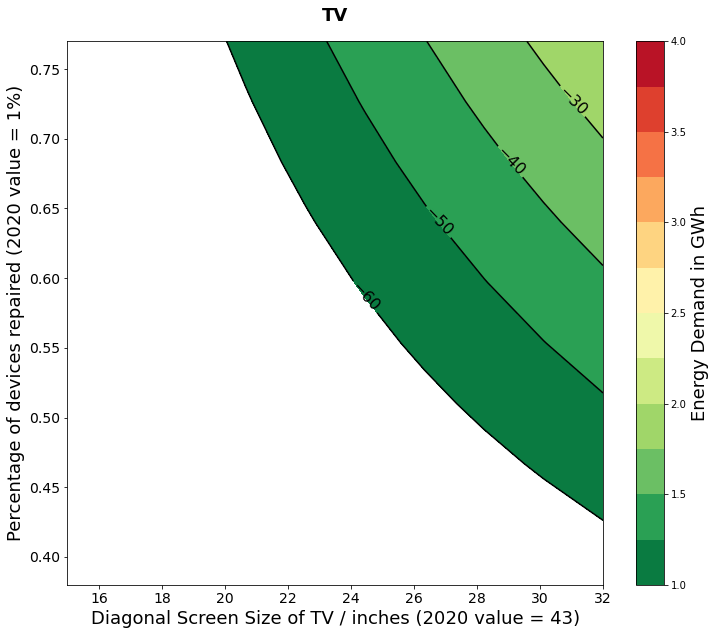

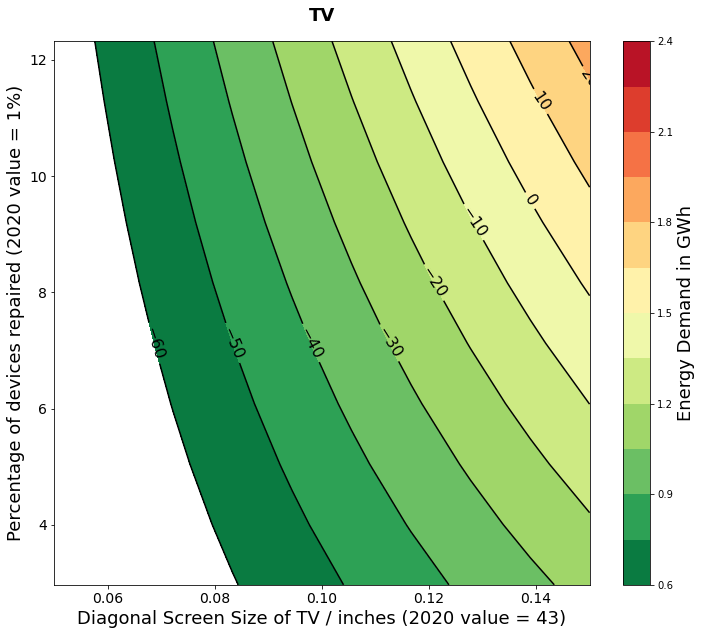

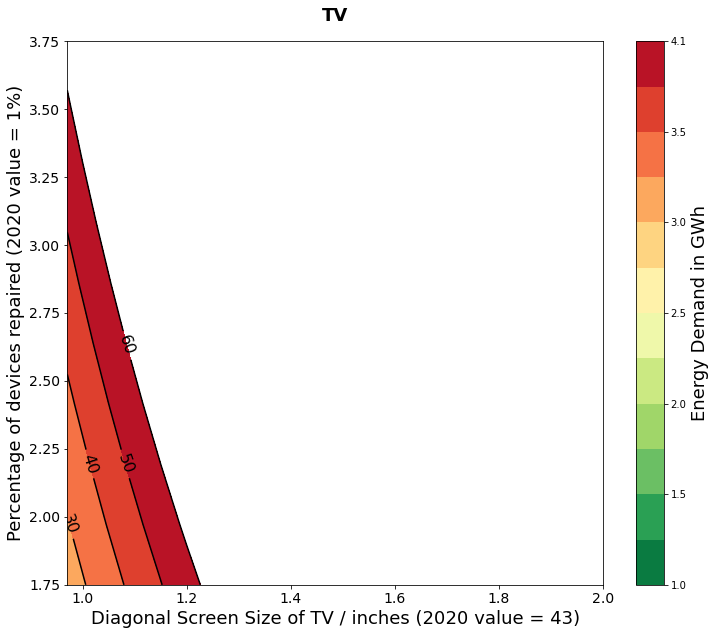

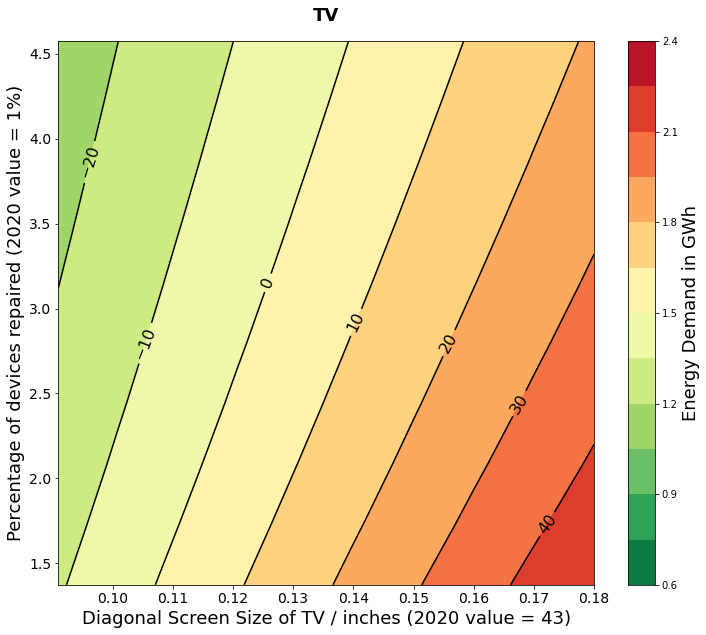

In [233]:
generate_contour_plot(WashingMachine_percent, WashingMachine_absolute, WashingMachine_reference)
generate_contour_plot(FridgeFreezer_percent, FridgeFreezer_absolute, FridgeFreezer_reference)
generate_contour_plot(TV_percent, TV_absolute, TV_reference)
generate_contour_plot(Monitor_percent, Monitor_absolute, Monitor_reference)
generate_contour_plot(Desktop_percent, Desktop_absolute, Desktop_reference)
generate_contour_plot(Laptop_percent, Laptop_absolute, Laptop_reference)
generate_contour_plot(Smartphone_percent, Smartphone_absolute, Smartphone_reference)





